In [109]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
dataset = pd.read_csv("dataset_phishing.csv")

In [111]:
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


## 1. Statistics of the dataset

### The provided dataset includes 11430 URLs with 50% legitimate and 50% phishing websites. <br>
### Each URL observation has 87 extracted **numerical** features, with 56 from the structure and syntax of URLs, 24 from the corresponding content of their pages, and 7 from  querying external services.

### Check whether there is any missing value in the dataset -- No missing value

In [112]:
for column in dataset.columns:  
    if sum(dataset[column].isnull()) > 0:
        print(column)

In [113]:
dataset.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


### If all of the values in the sample are identical, the sample standard deviation will be zero. Therefore, we might get rid of those columns

In [114]:
identical_columns = []
for column in dataset.describe().columns:
    if dataset.describe().loc['std',column] == 0 :
        identical_columns.append(column)
identical_columns

['nb_or',
 'ratio_nullHyperlinks',
 'ratio_intRedirection',
 'ratio_intErrors',
 'submit_email',
 'sfh']

In [115]:
for column in identical_columns:
    del dataset[column]

### Identify which columns are numeric variables and which columns are boolean variables

In [27]:
bool_cols = [col for col in dataset.iloc[:,1:-1]
             if np.isin(dataset[col].dropna().unique(), [0, 1]).all()]

In [28]:
numeric_cols = []
for column in dataset.iloc[:,1:-1].columns:
    if column not in bool_cols:
        numeric_cols.append(column)

In [118]:
print(numeric_cols)

['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_percent', 'nb_slash', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'http_in_path', 'ratio_digits_url', 'ratio_digits_host', 'nb_subdomains', 'nb_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extRedirection', 'ratio_extErrors', 'links_in_tags', 'ratio_intMedia', 'ratio_extMedia', 'safe_anchor', 'domain_registration_length', 'domain_age', 'web_traffic', 'page_rank']


In [91]:
dataset[bool_cols].astype('object').describe()

,ip,nb_tilde,nb_star,nb_dslash,https_token,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,...,iframe,popup_window,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,dns_record,google_index
count,11430,11430,11430,11430,11430,11430,11430,11430,11430,11430,...,11430,11430,11430,11430,11430,11430,11430,11430,11430,11430
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
freq,9709,11354,11422,11355,6983,11426,11403,10680,10857,11183,...,11415,11361,11417,11414,10004,8868,6406,10597,11200,6103


In [92]:
dataset[numeric_cols].describe()

,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_percent,...,ratio_extRedirection,ratio_extErrors,links_in_tags,ratio_intMedia,ratio_extMedia,safe_anchor,domain_registration_length,domain_age,web_traffic,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000
mean,61.126684,21.090289,2.480752,0.997550,0.022222,0.141207,0.162292,0.293176,0.322660,0.123097,...,0.158926,0.062469,51.978211,42.870444,23.236293,37.063922,492.532196,4062.543745,8.567566e+05,3.185739
std,55.297318,10.777171,1.369686,2.087087,0.155500,0.364456,0.821337,0.998317,1.093336,1.466450,...,0.266437,0.156209,41.523144,46.249897,38.386577,39.073385,814.769415,3107.784600,1.995606e+06,2.536955
min,12.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000
25%,33.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,1.000000
50%,47.000000,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,60.000000,11.111111,0.000000,23.294574,242.000000,3993.000000,1.651000e+03,3.000000
75%,71.000000,24.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.230769,0.034483,98.061004,100.000000,33.333333,75.000000,449.000000,7026.750000,3.738455e+05,5.000000
max,1641.000000,214.000000,24.000000,43.000000,4.000000,3.000000,19.000000,19.000000,18.000000,96.000000,...,2.000000,1.000000,100.000000,100.000000,100.000000,100.000000,29829.000000,12874.000000,1.076799e+07,10.000000


## 2. Encode 'status' as target
### legitimate as 1; phishing as 0

In [7]:
dataset['target'] = pd.get_dummies(dataset['status'])['legitimate'].astype('int')

In [8]:
dataset

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,...,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,target
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,1,0,45,-1,0,1,1,4,legitimate,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,0,0,77,5767,0,0,1,2,phishing,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,3,...,0,0,14,4004,5828815,0,1,0,phishing,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0,0,62,-1,107721,0,0,3,legitimate,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,1,0,224,8175,8725,0,0,6,legitimate,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,448,5396,3980,0,0,6,legitimate,1
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,1,...,0,0,211,6728,0,0,1,0,phishing,0
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,...,0,0,2809,8515,8,0,1,10,legitimate,1
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,0,0,85,2836,2455493,0,0,4,legitimate,1


In [9]:
del dataset['status']

In [10]:
phishing_df = dataset[dataset['target'] == 0]
legitimate_df = dataset[dataset['target'] == 1]

## 3. Visualization of the dataset

### 3.1 Histograms

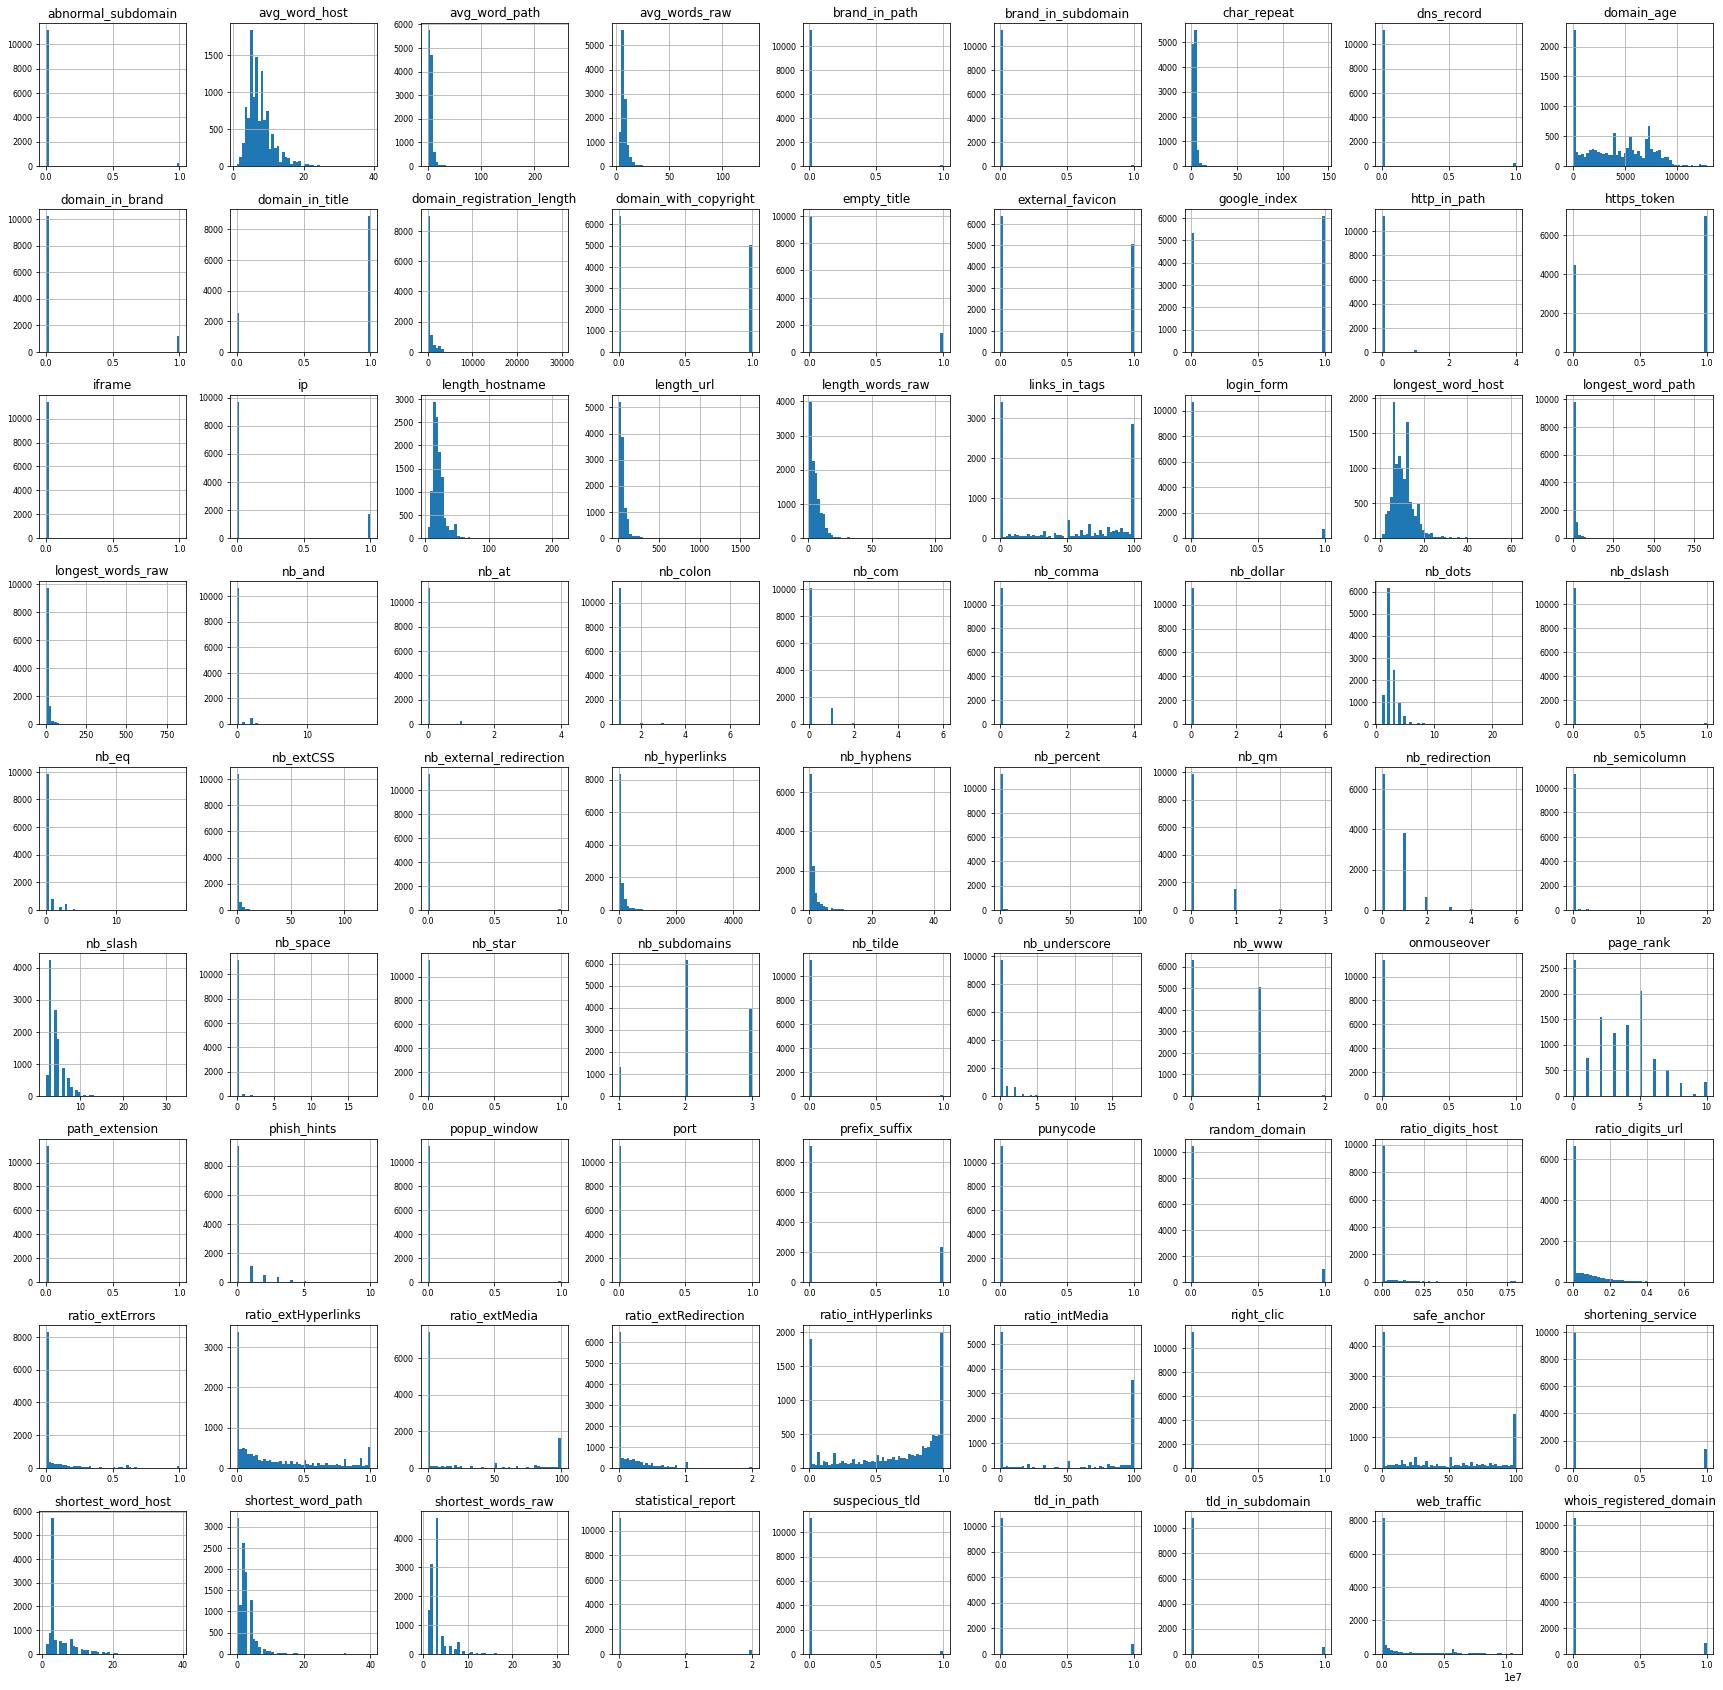

In [29]:
dataset.iloc[:,:-1].hist(figsize=(30, 30), bins=50,xlabelsize=8, ylabelsize=8);

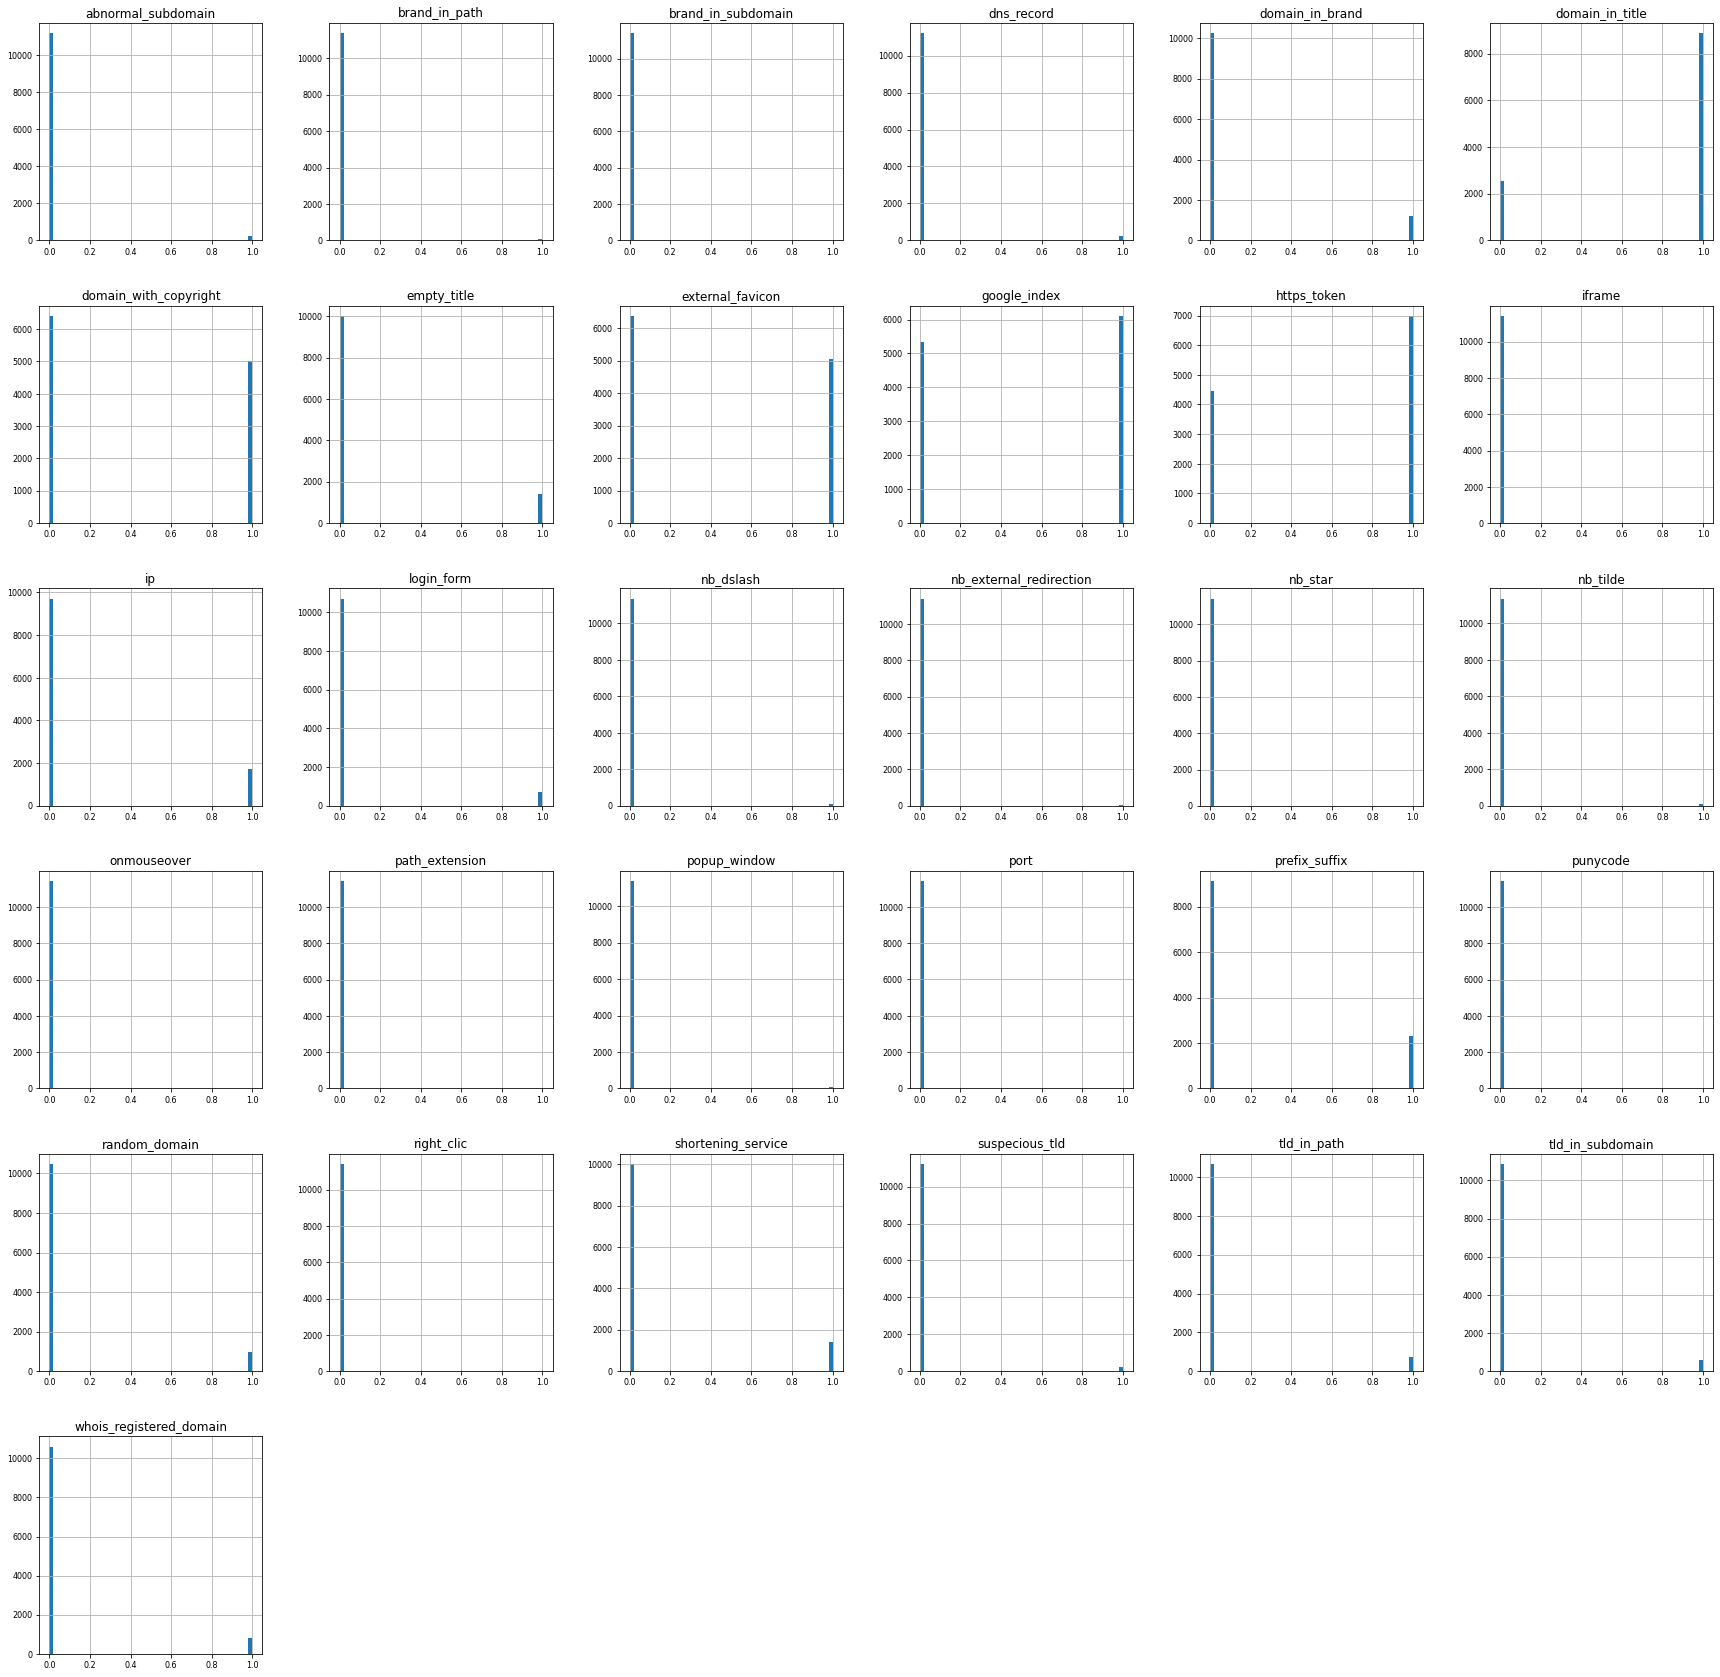

In [30]:
dataset[bool_cols].hist(figsize=(30, 30), bins=50,xlabelsize=8, ylabelsize=8);

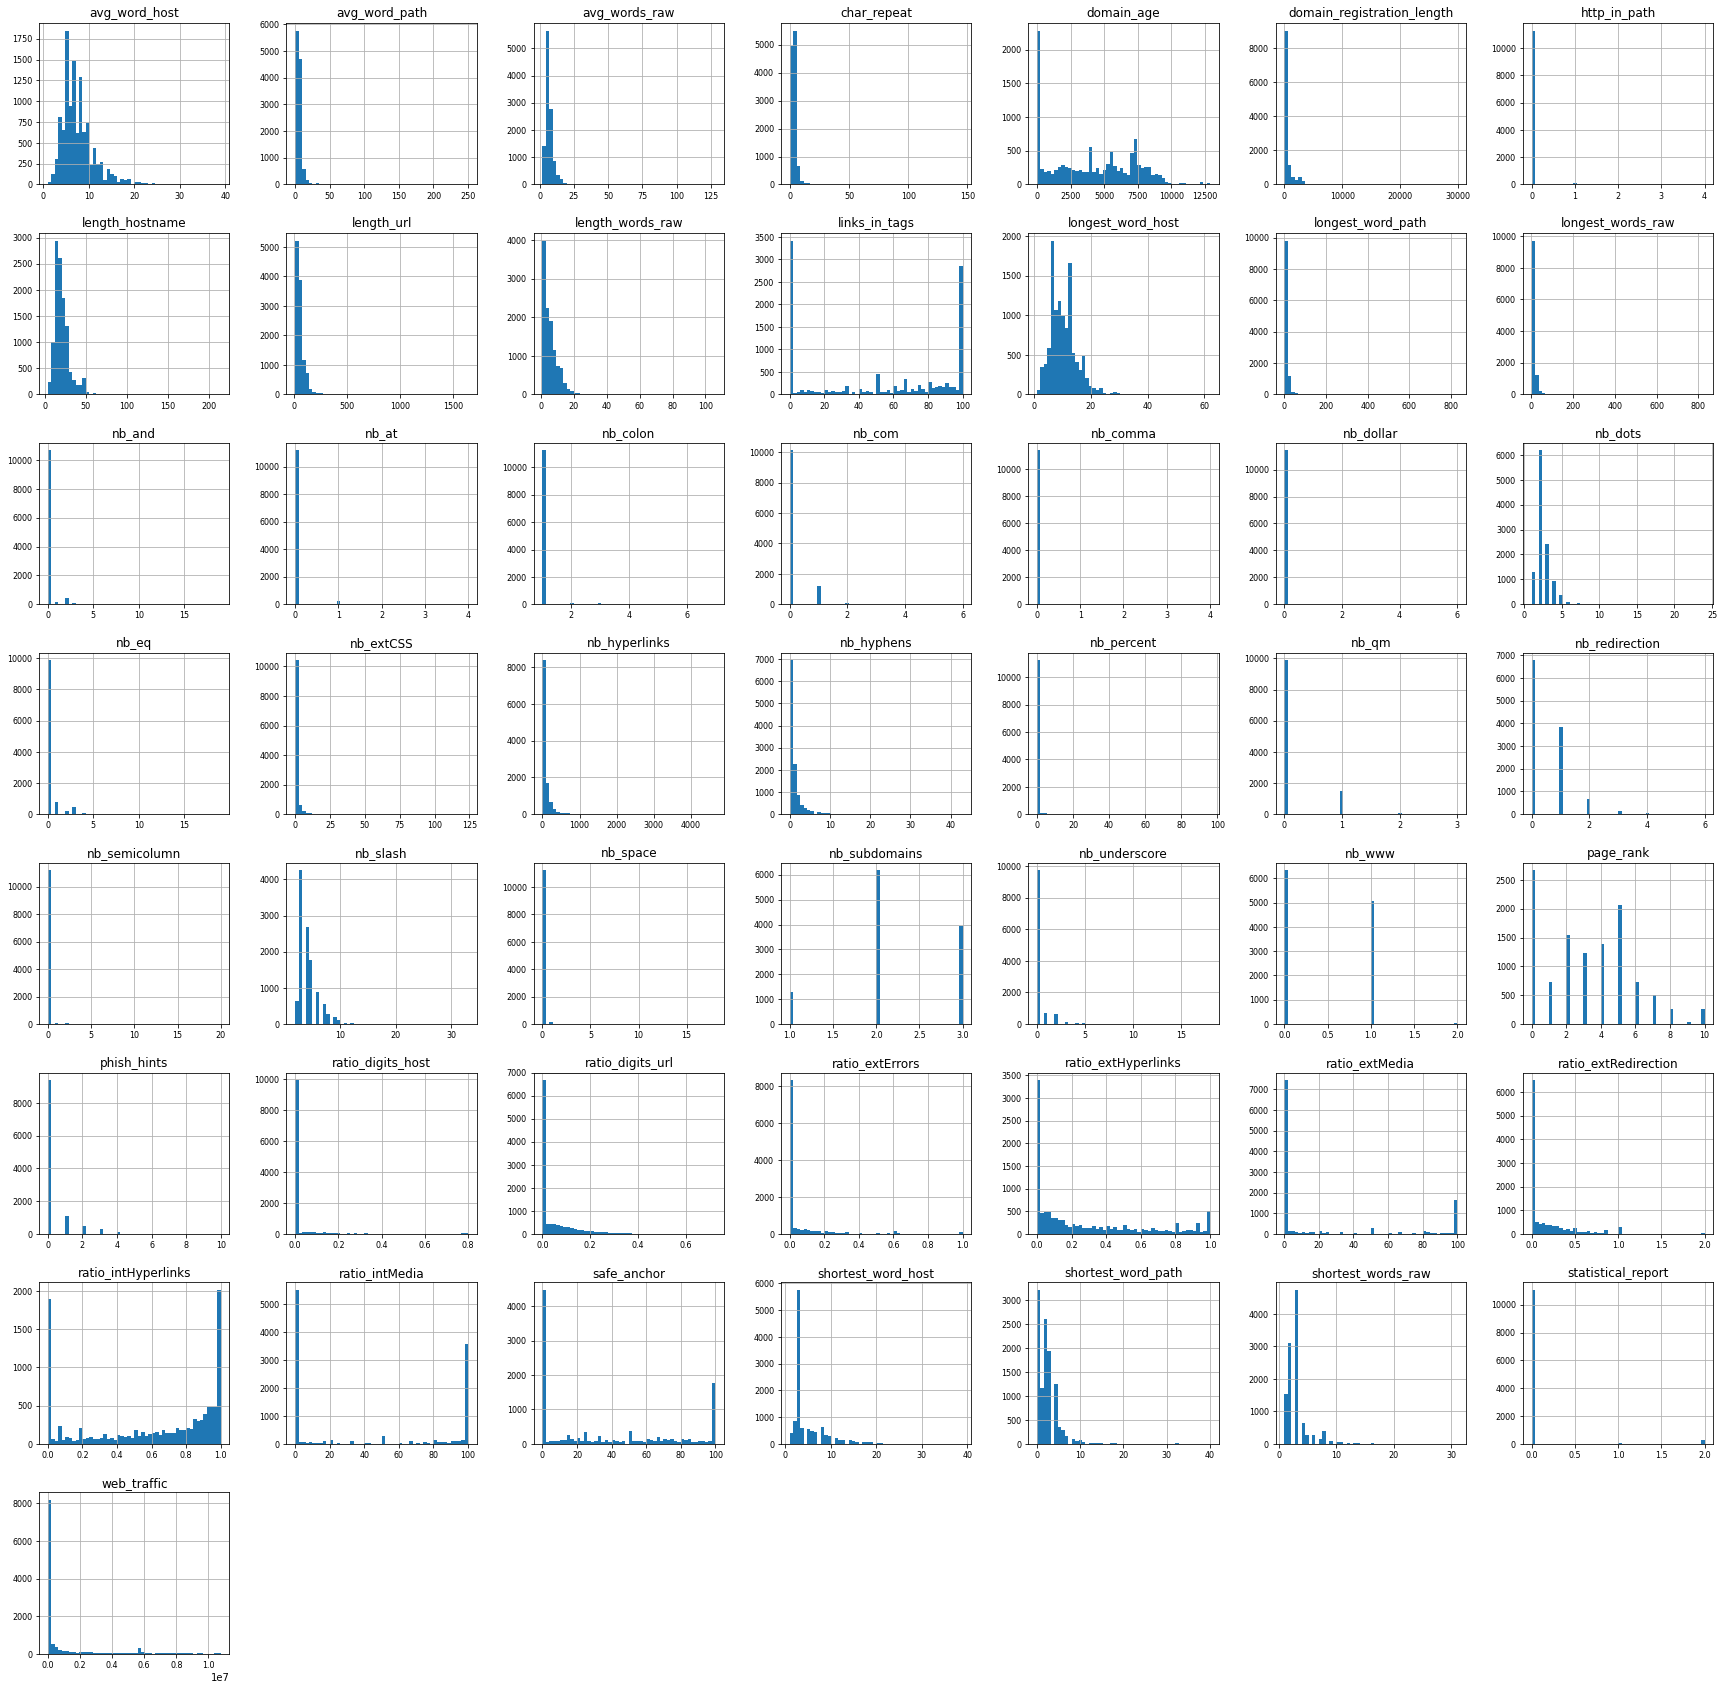

In [31]:
dataset[numeric_cols].hist(figsize=(30, 30), bins=50,xlabelsize=8, ylabelsize=8);

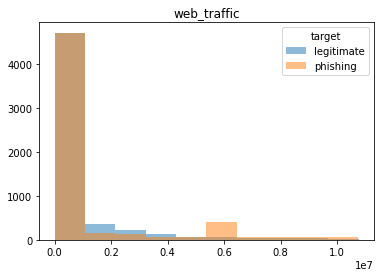

In [32]:
i = 'web_traffic'
#define points values by group
A = dataset.loc[dataset['target'] == 1, i]
B = dataset.loc[dataset['target'] == 0, i]

#add three histograms to one plot
plt.hist(A, alpha=0.5, label='legitimate')
plt.hist(B, alpha=0.5, label='phishing')

#add plot title and axis labels
plt.title(i)

#add legend
plt.legend(title='target')

#display plot
plt.show()

In [44]:
# for i in dataset.iloc[:,1:-1].columns:
#     #define points values by group
#     A = dataset.loc[dataset['target'] == 1, i]
#     B = dataset.loc[dataset['target'] == 0, i]

#     #add three histograms to one plot
#     plt.hist(A, alpha=0.5, label='legitimate')
#     plt.hist(B, alpha=0.5, label='phishing')

#     #add plot title and axis labels
#     plt.title(i)

#     #add legend
#     plt.legend(title='target')

#     #display plot
#     plt.show()

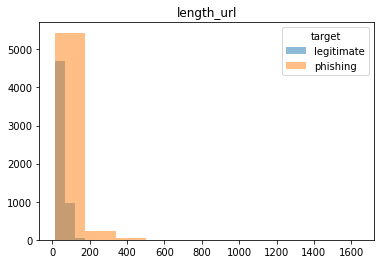

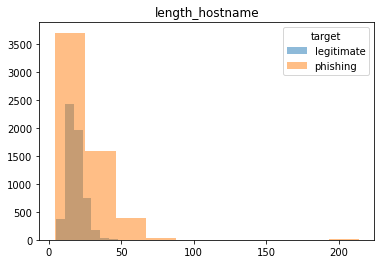

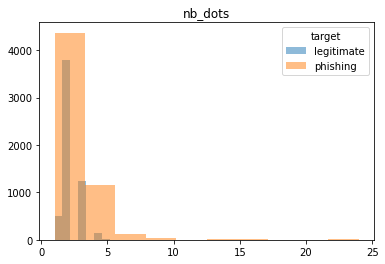

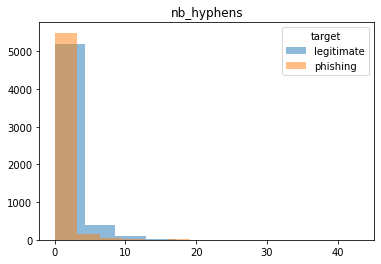

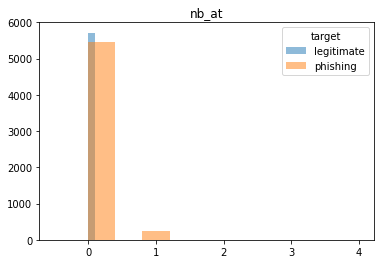

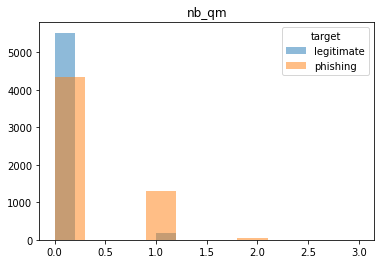

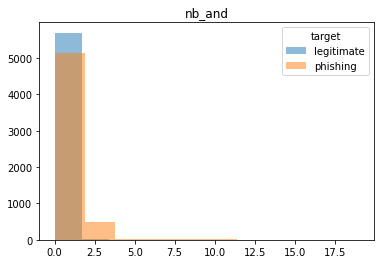

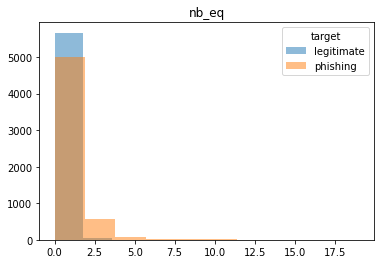

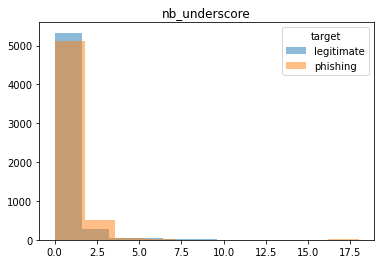

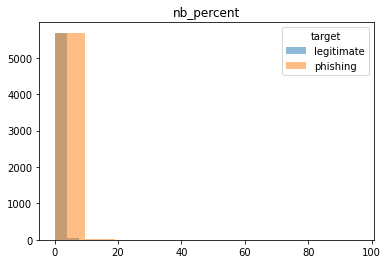

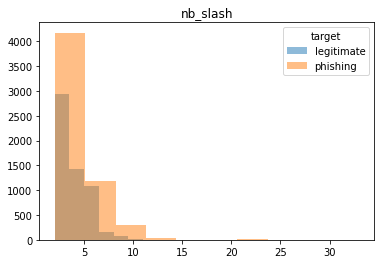

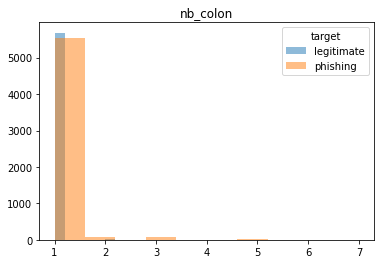

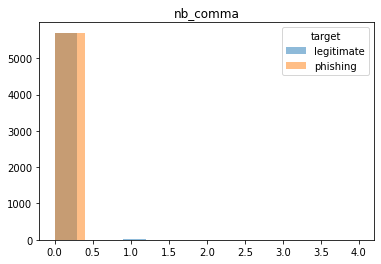

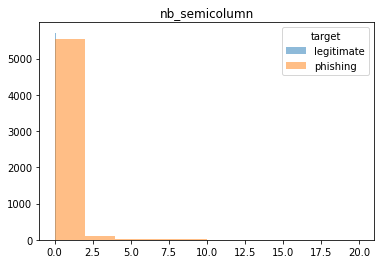

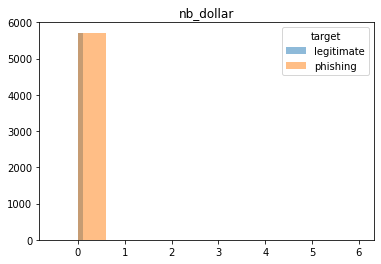

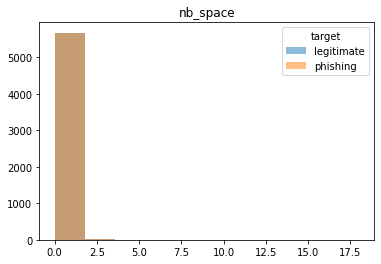

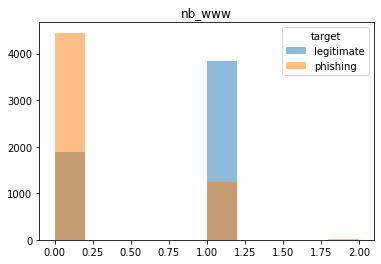

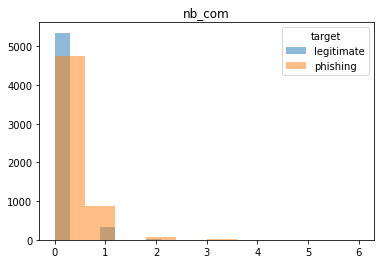

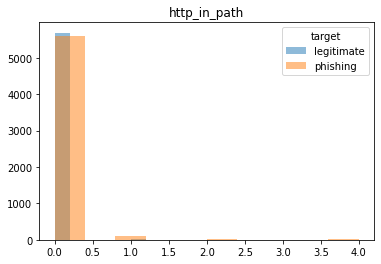

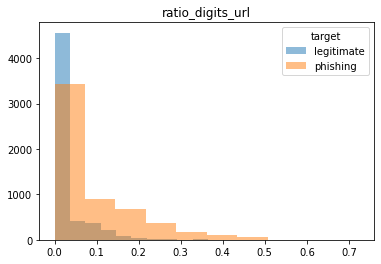

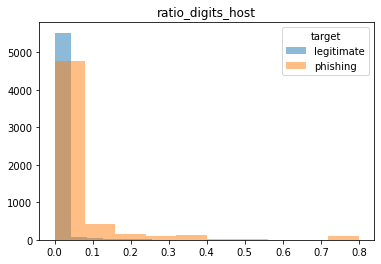

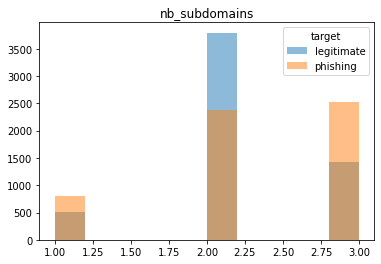

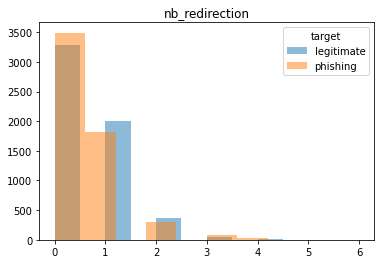

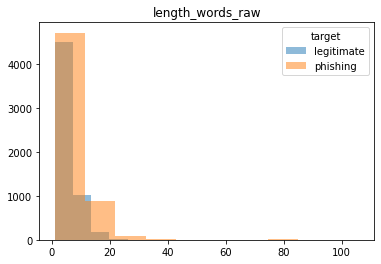

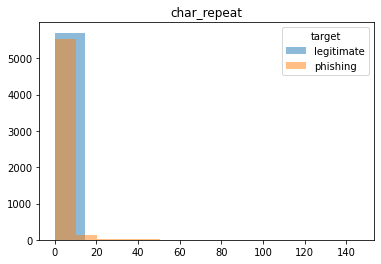

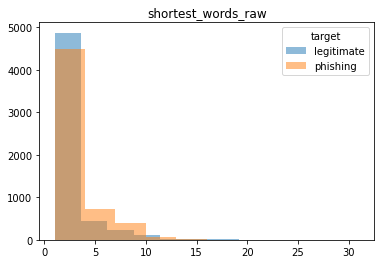

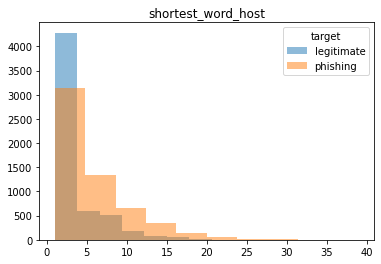

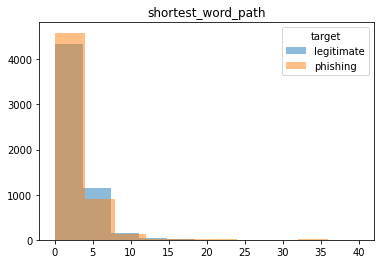

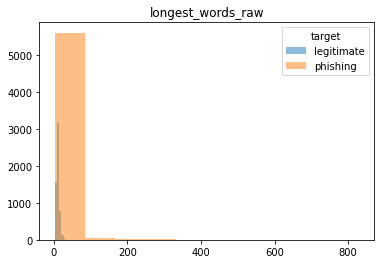

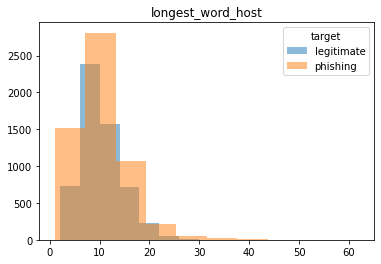

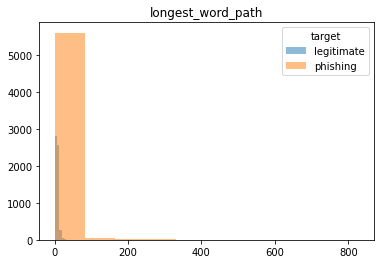

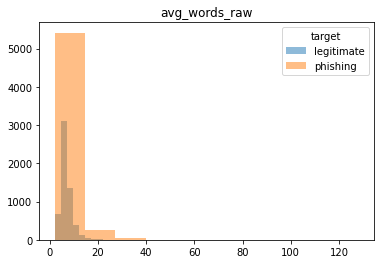

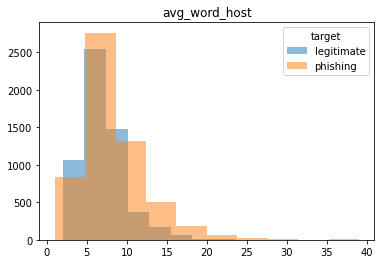

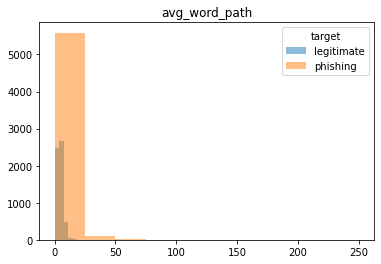

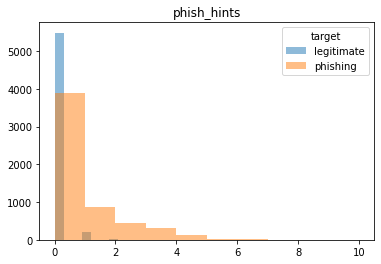

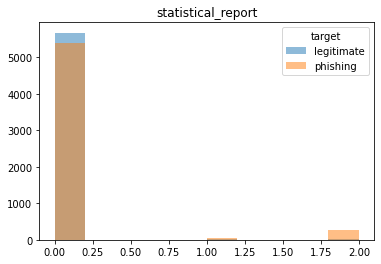

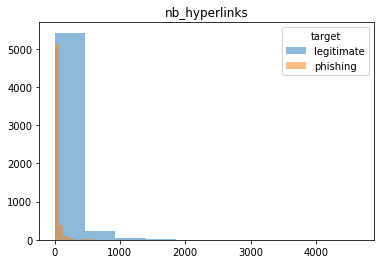

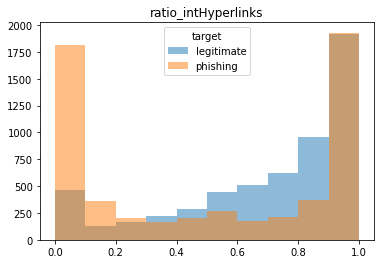

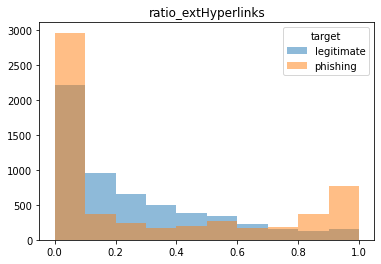

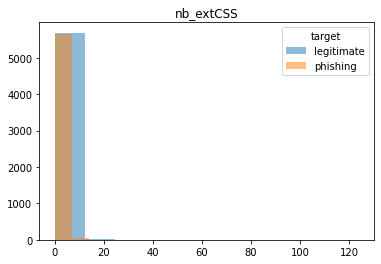

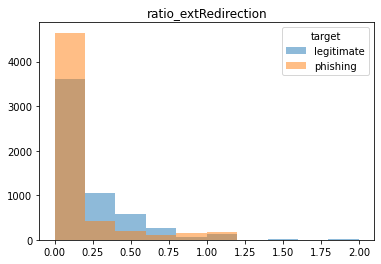

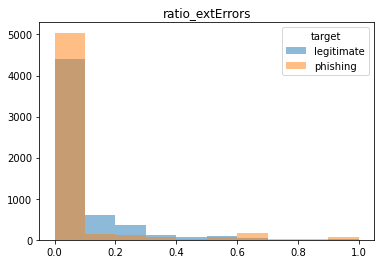

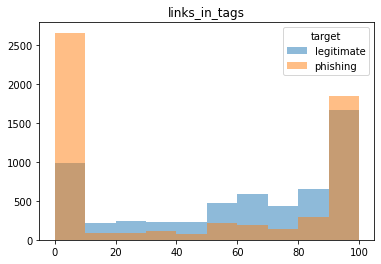

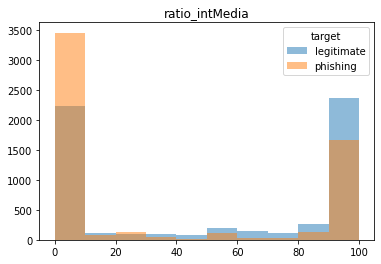

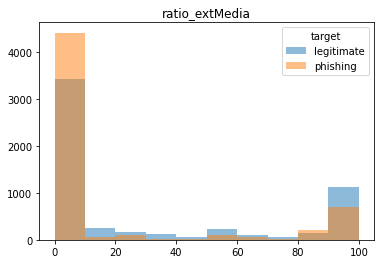

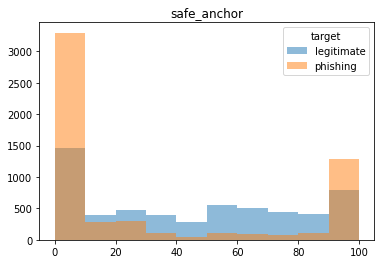

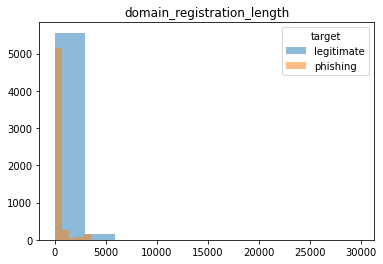

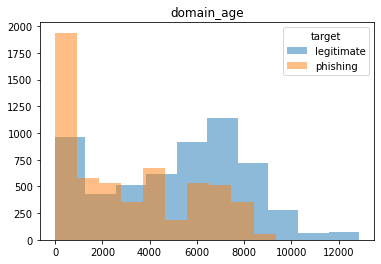

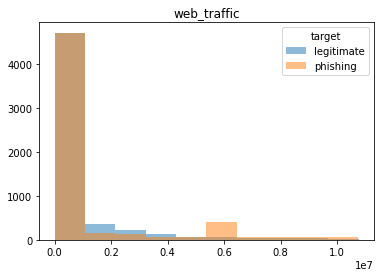

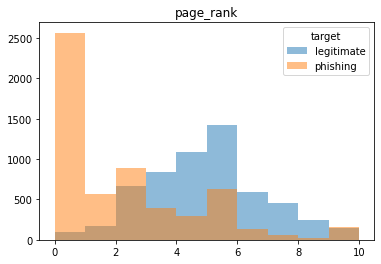

In [34]:
for i in dataset[numeric_cols].columns:
    #define points values by group
    A = dataset.loc[dataset['target'] == 1, i]
    B = dataset.loc[dataset['target'] == 0, i]

    #add three histograms to one plot
    plt.hist(A, alpha=0.5, label='legitimate')
    plt.hist(B, alpha=0.5, label='phishing')

    #add plot title and axis labels
    plt.title(i)

    #add legend
    plt.legend(title='target')

    #display plot
    plt.show()

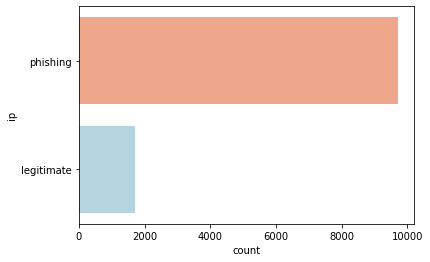

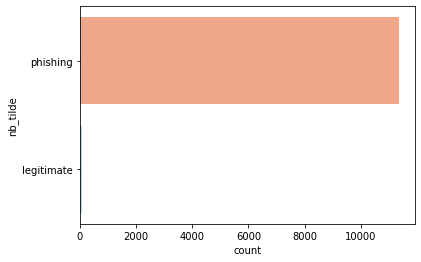

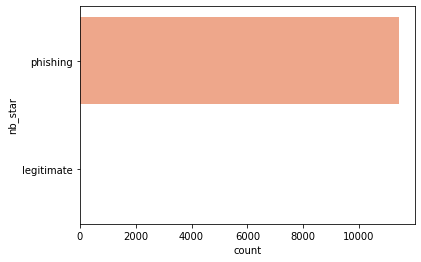

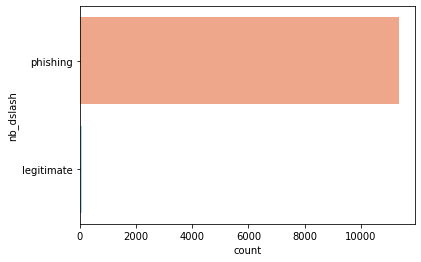

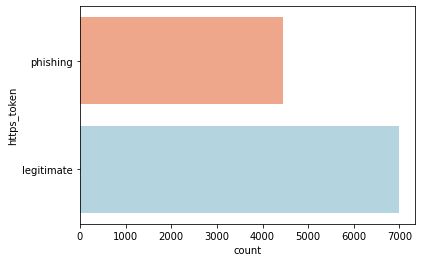

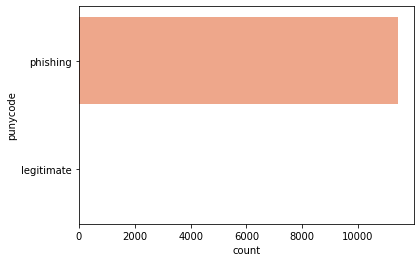

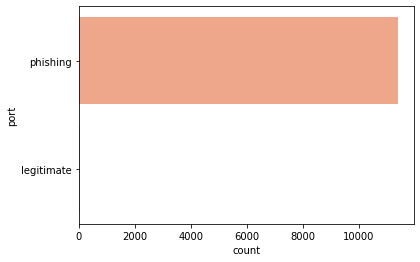

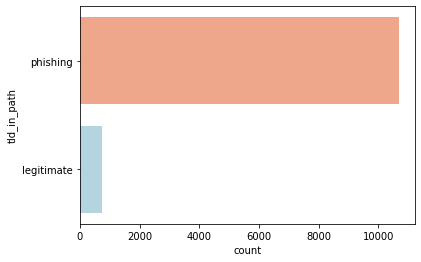

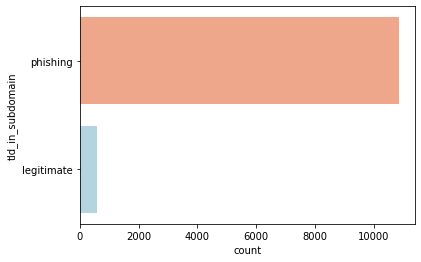

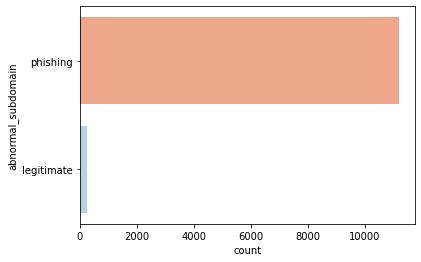

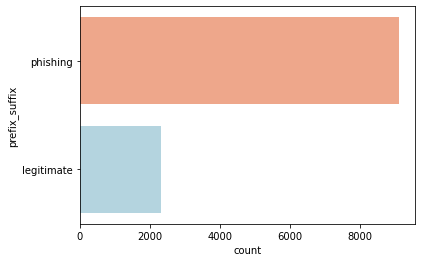

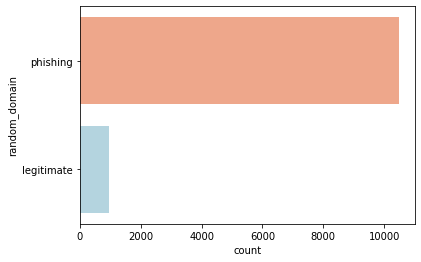

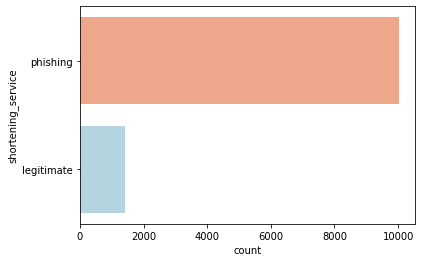

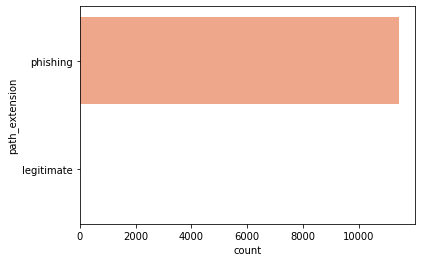

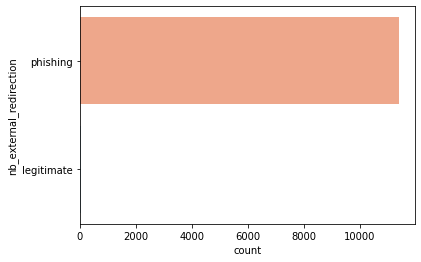

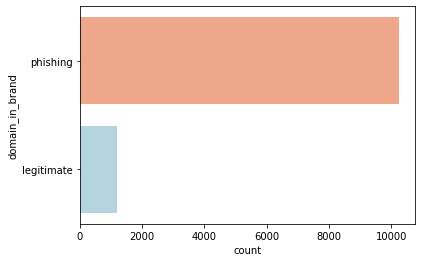

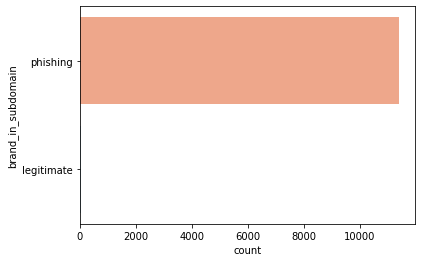

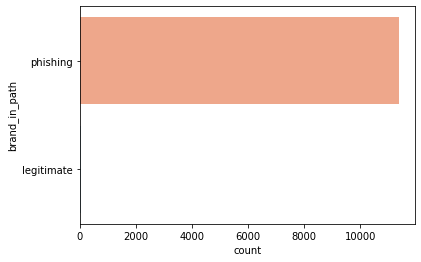

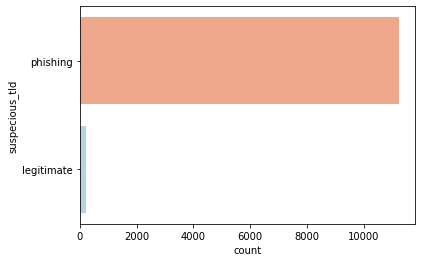

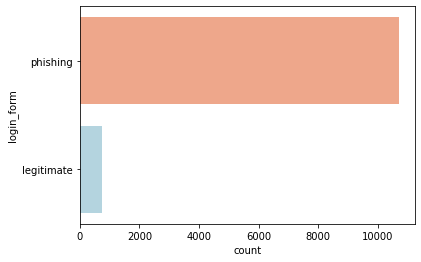

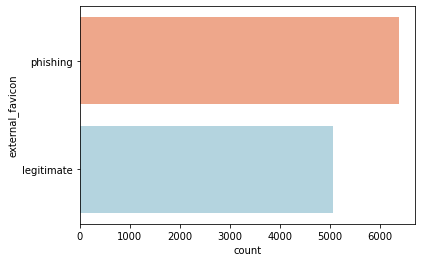

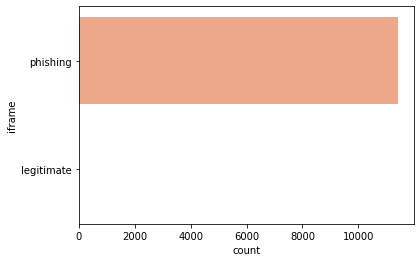

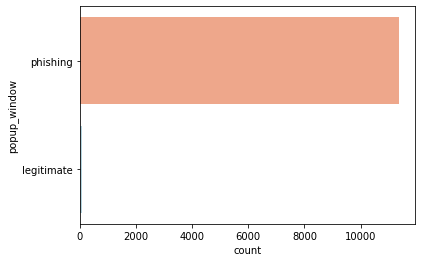

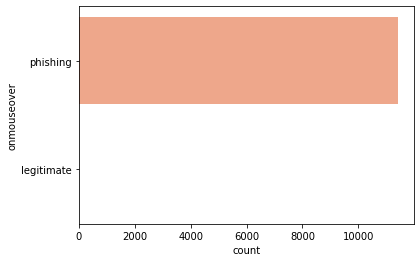

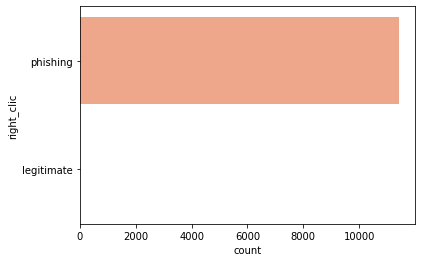

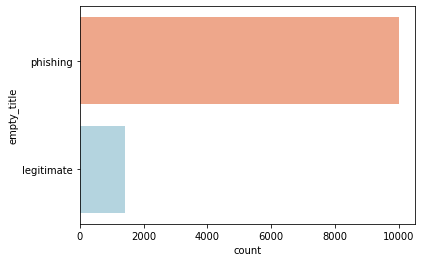

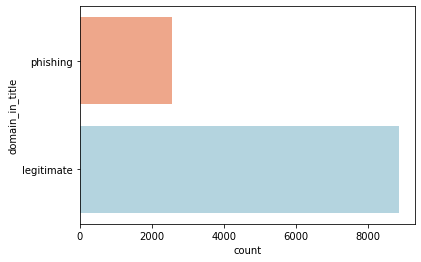

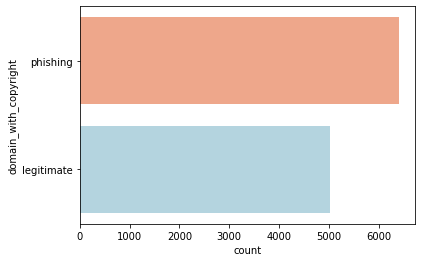

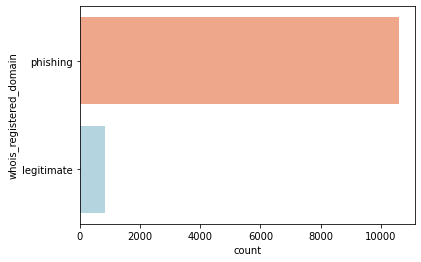

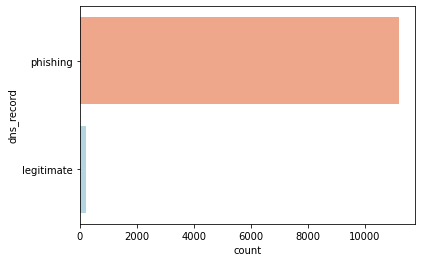

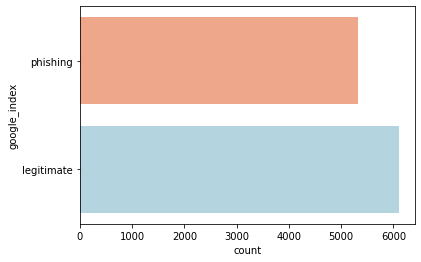

In [103]:
my_pal = {1: "lightblue", 0: "lightsalmon"}
for i in dataset[bool_cols].columns:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        sns.countplot(y=i, data=dataset,palette=my_pal)
        ax.set_yticklabels(['phishing', 'legitimate'])
        plt.show()

In [108]:
dataset.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyper

In [101]:
# for i in dataset[bool_cols].columns:
#     #define points values by group
#     A = dataset.loc[dataset['target'] == 1, i]
#     B = dataset.loc[dataset['target'] == 0, i]

#     #add three histograms to one plot
#     plt.hist(A, alpha=0.5, label='legitimate')
#     plt.hist(B, alpha=0.5, label='phishing')

#     #add plot title and axis labels
#     plt.title(i)

#     #add legend
#     plt.legend(title='target')

#     #display plot
#     plt.show()

### 3.2 Boxplots

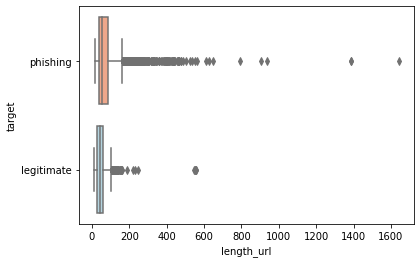

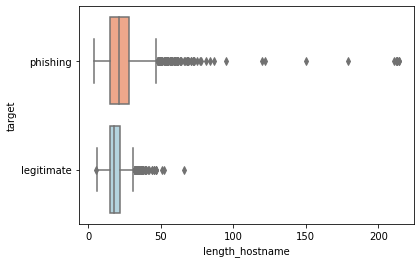

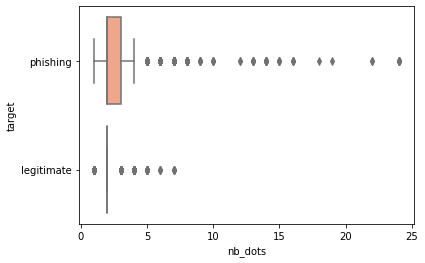

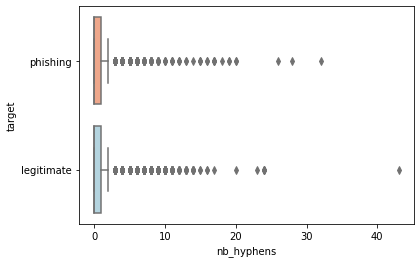

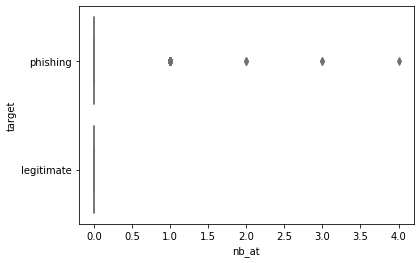

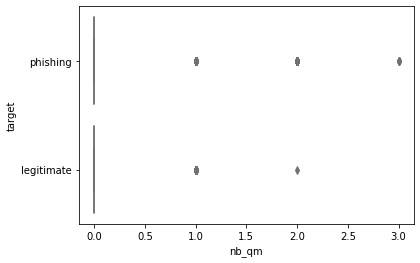

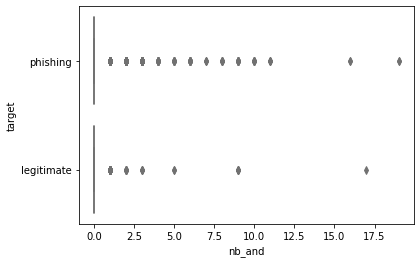

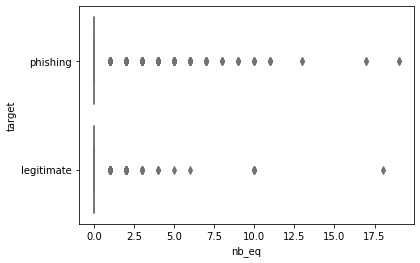

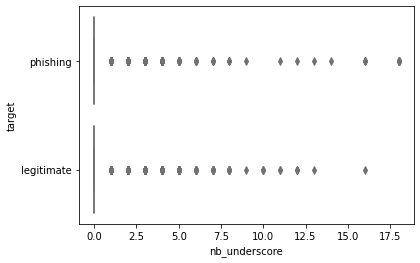

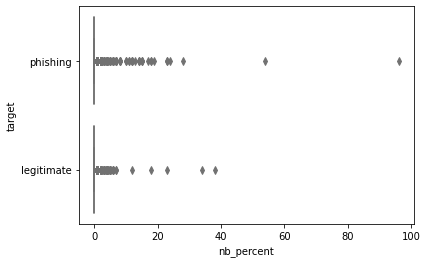

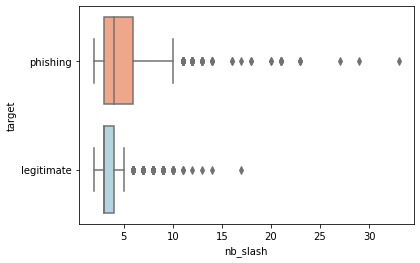

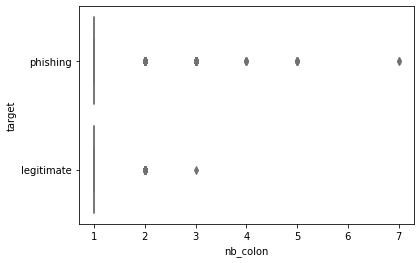

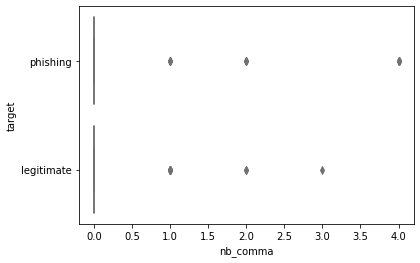

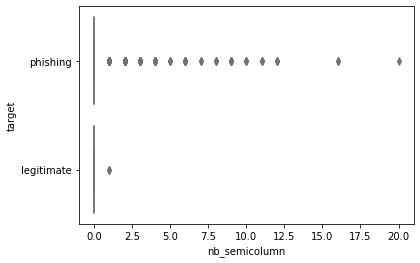

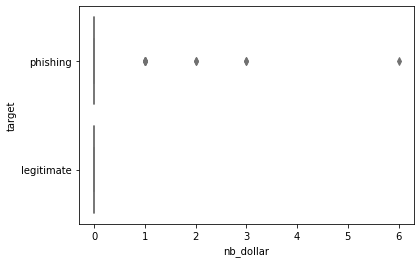

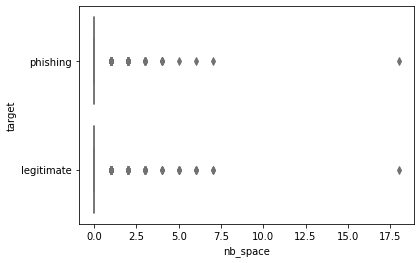

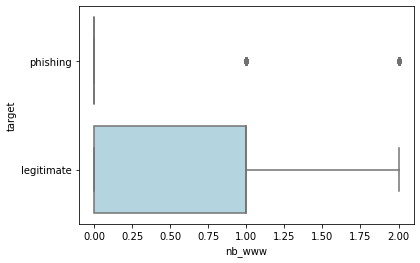

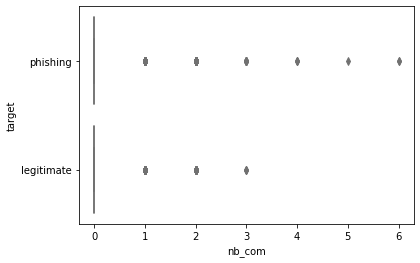

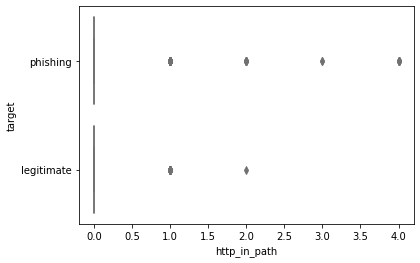

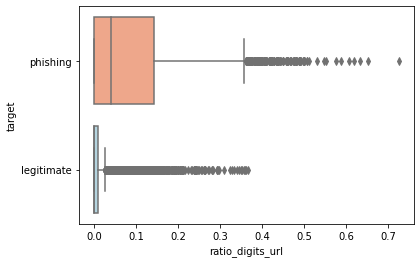

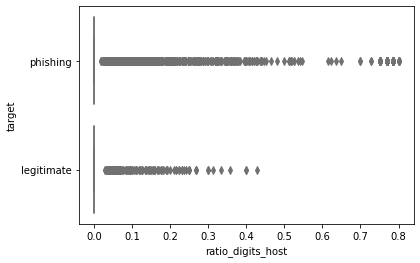

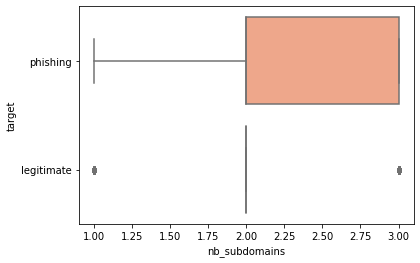

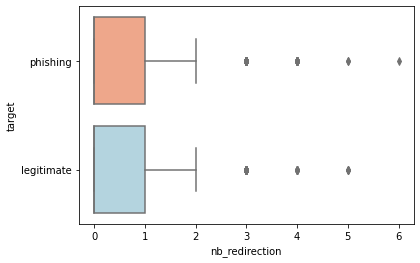

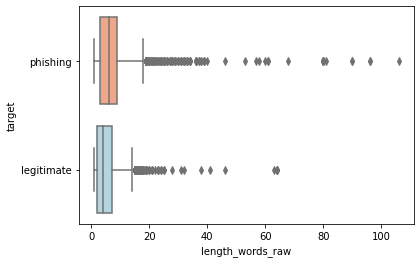

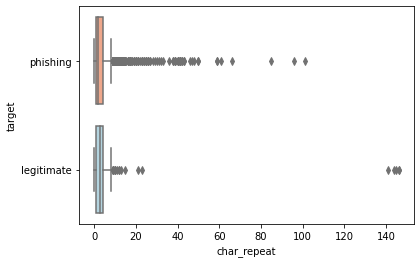

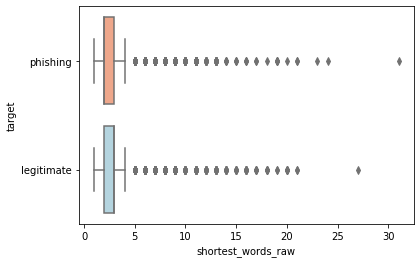

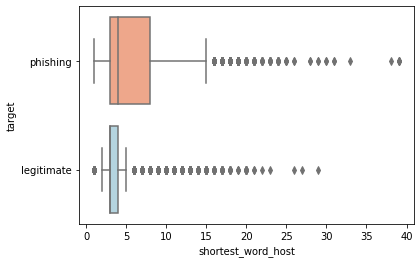

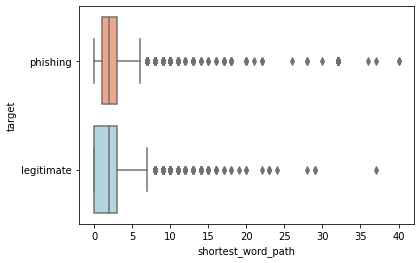

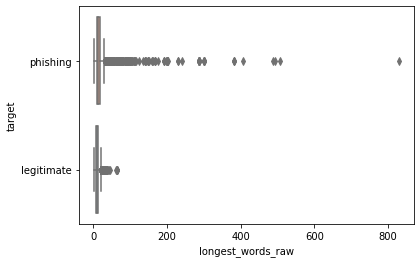

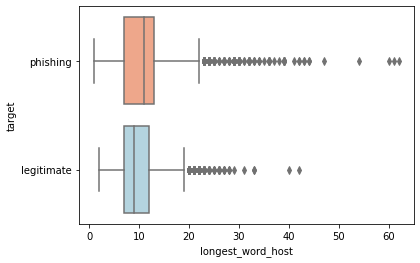

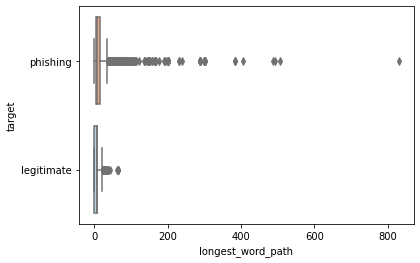

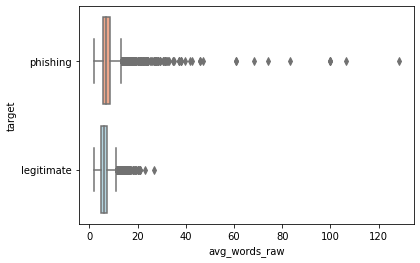

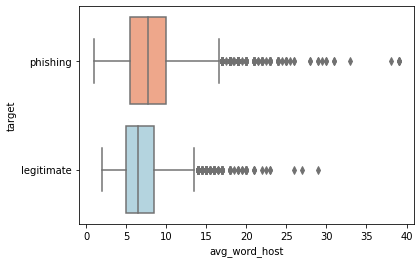

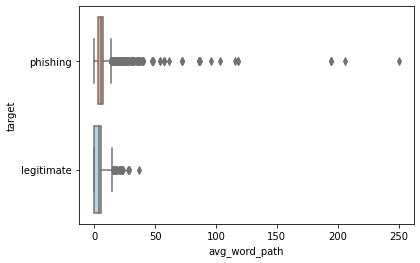

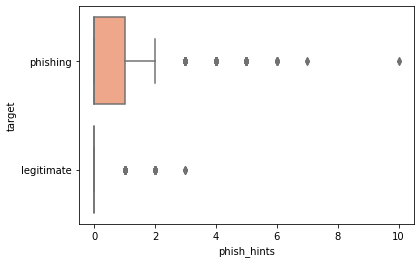

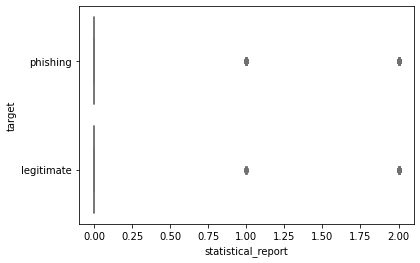

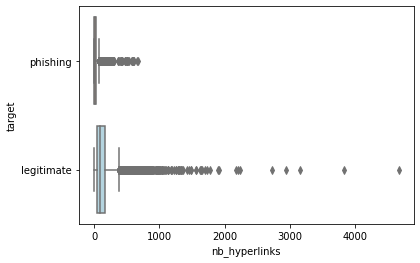

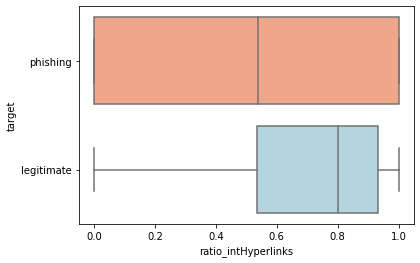

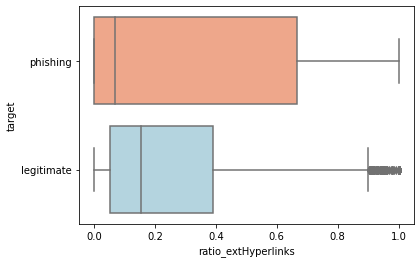

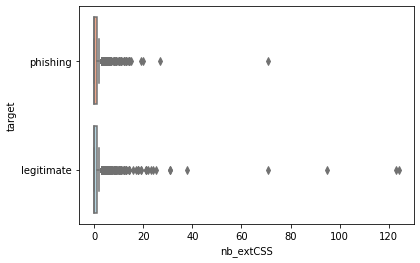

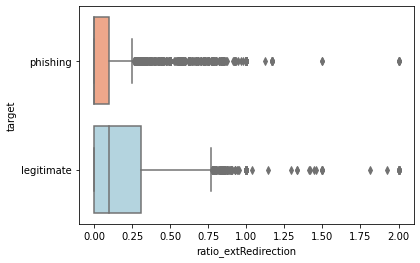

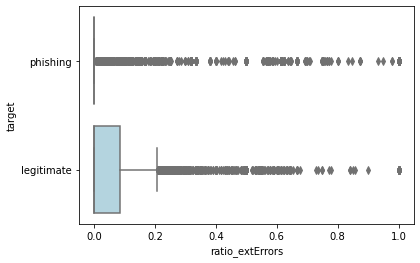

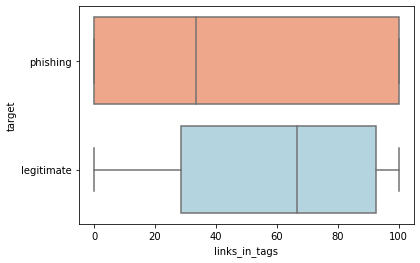

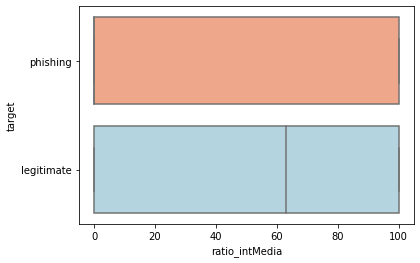

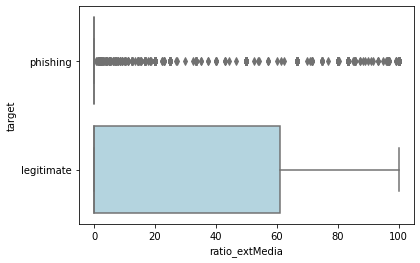

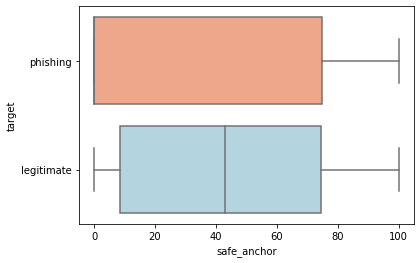

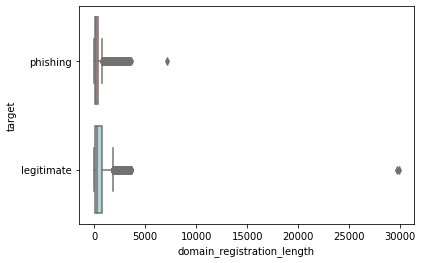

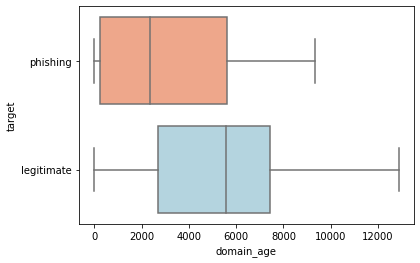

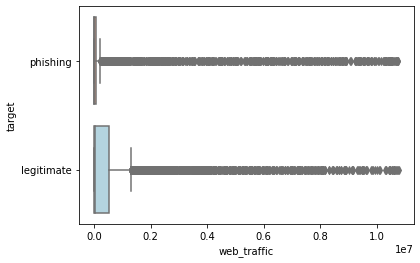

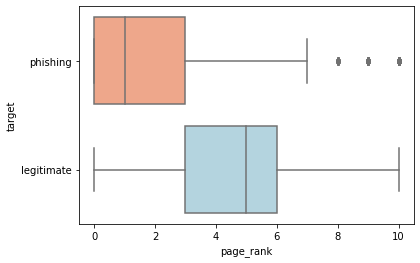

In [63]:
my_pal = {1: "lightblue", 0: "lightsalmon"}
for col in numeric_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.boxplot(y = dataset['target'].astype('category'), x = col, data=dataset, palette=my_pal)
    ax.set_yticklabels(['phishing', 'legitimate'])
    plt.show()

### 3.3 Heatmap of correlations

In [64]:
corr = dataset[numeric_cols].corr()

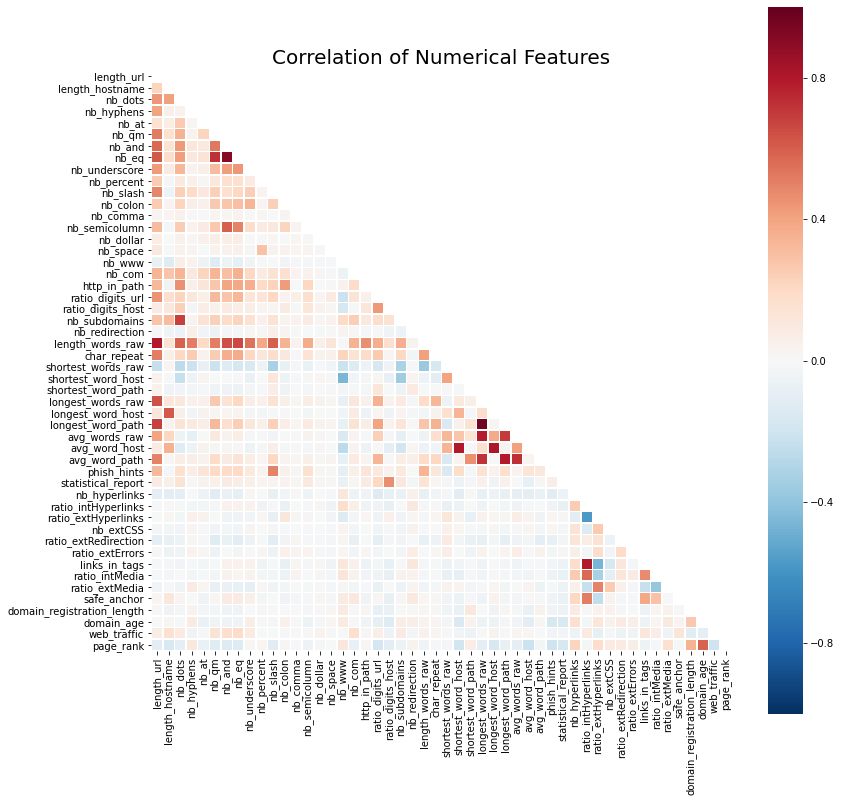

In [95]:
fig = plt.figure(figsize=(13,13))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='RdBu_r', 
            square=True, linewidths=.5,vmax=1, vmin=-1)
plt.title('Correlation of Numerical Features', fontsize=20)
plt.show()